In [ ]:
data_yaml = f"""
    train: /content/drive/MyDrive/CV/Data_YOLO/train
    val: /content/drive/MyDrive/CV/Data_YOLO/valid
    test: /content/drive/MyDrive/CV/Data_YOLO/test
    nc: 3
    names:
        0 : go
        1 : warning
        2 : stop
    """

In [ ]:
with open('/content/drive/MyDrive/CV/Data_YOLO/data.yaml', 'a+') as f:
    f.write(data_yaml)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 15978 (delta 89), reused 118 (delta 75), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.61 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (10958/10958), done.


In [ ]:
%cd /content/drive/MyDrive/CV/yolov5/yolov5

/content/drive/MyDrive/CV/yolov5/yolov5


In [2]:
!pip install -r requirements.txt  # install

ERROR: Invalid requirement: '#'


In [ ]:
import os
import cv2
import imutils
import torch
import glob

from google.colab.patches import cv2_imshow
from IPython.display import Image, display, clear_output  # to display images


print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


## Train

In [ ]:
!python train.py --weights yolov5l.pt --img 640 --batch-size -1 --epochs 20 --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml  --cache 

train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

In [ ]:
!python train.py --resume /content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/last.pt --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

In [ ]:
!python train.py --resume /content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/last.pt --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

## Eval

In [ ]:
!python val.py --weights /content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml --task val --iou-thres 0.5

val: data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, weights=['/content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /content/drive/MyDrive/CV/Data_YOLO/valid/labels.cache... 2605 images, 0 backgrounds, 0 corrupt: 100% 2605/2605 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 82/82 [01:27<00:00,  1.07s/it]
                   all       2605       9083      0.929      0.947      0.956       0.72
                    go       2605  

In [ ]:
!python val.py --weights /content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml --task test --iou-thres 0.5

val: data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, weights=['/content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
test: Scanning /content/drive/MyDrive/CV/Data_YOLO/test/labels... 1305 images, 0 backgrounds, 0 corrupt: 100% 1305/1305 [04:45<00:00,  4.57it/s]
test: New cache created: /content/drive/MyDrive/CV/Data_YOLO/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 41/41 [00:43<00:00,  1.06s/it]
                   all       1305       45

In [ ]:
!python val.py --weights /content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/CV/Data_YOLO/data.yaml --task test --iou-thres 0.75

val: data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, weights=['/content/drive/MyDrive/CV/yolov5/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.75, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
test: Scanning /content/drive/MyDrive/CV/Data_YOLO/test/labels.cache... 1305 images, 0 backgrounds, 0 corrupt: 100% 1305/1305 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 41/41 [00:43<00:00,  1.07s/it]
                   all       1305       4528      0.926       0.96      0.972      0.734
                    go       1305

## Detect

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/images/test.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/images/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/CV/test/images/test.jpg: 480x640 3 stops, 51.0ms
Speed: 0.8ms pre-process, 51.0ms inference, 110.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


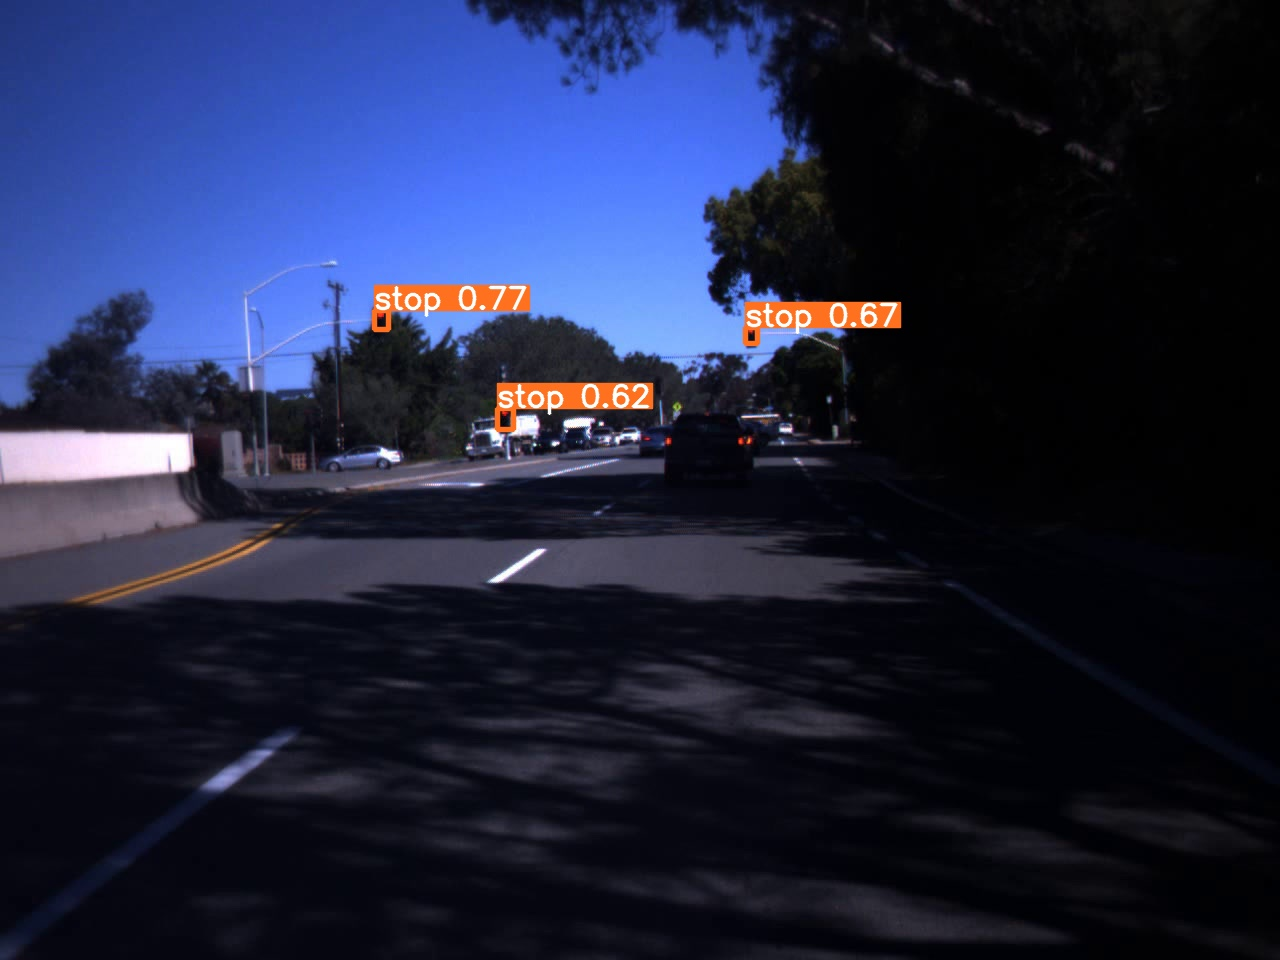

In [ ]:
display(Image(filename='runs/detect/exp/test.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/images/test2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/images/test2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/CV/test/images/test2.jpg: 416x640 (no detections), 75.8ms
Speed: 0.8ms pre-process, 75.8ms inference, 11.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


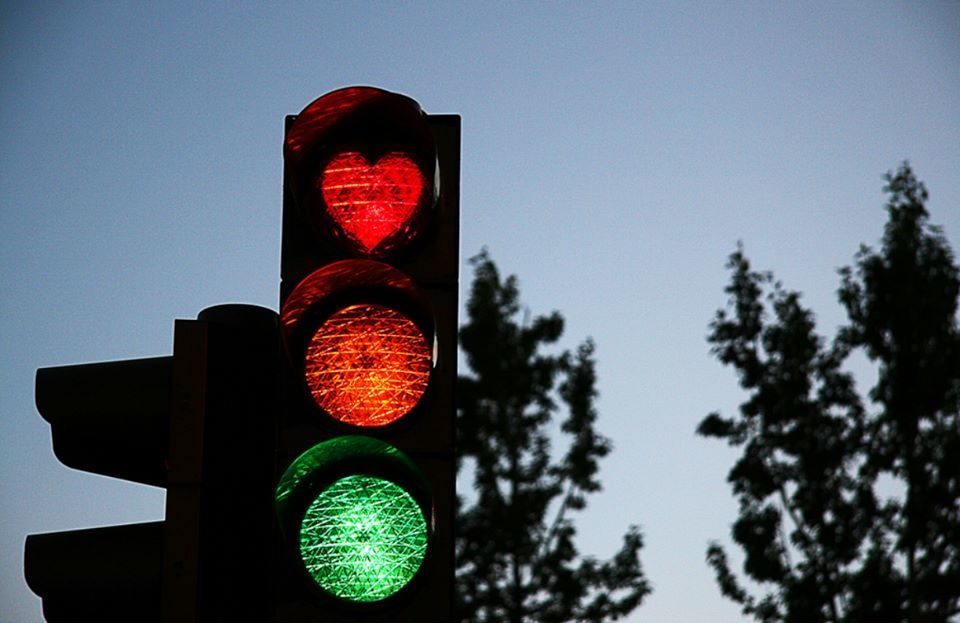

In [ ]:
display(Image(filename='runs/detect/exp3/test2.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/images/test3.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/images/test3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/CV/test/images/test3.jpg: 640x480 4 gos, 49.0ms
Speed: 0.7ms pre-process, 49.0ms inference, 67.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


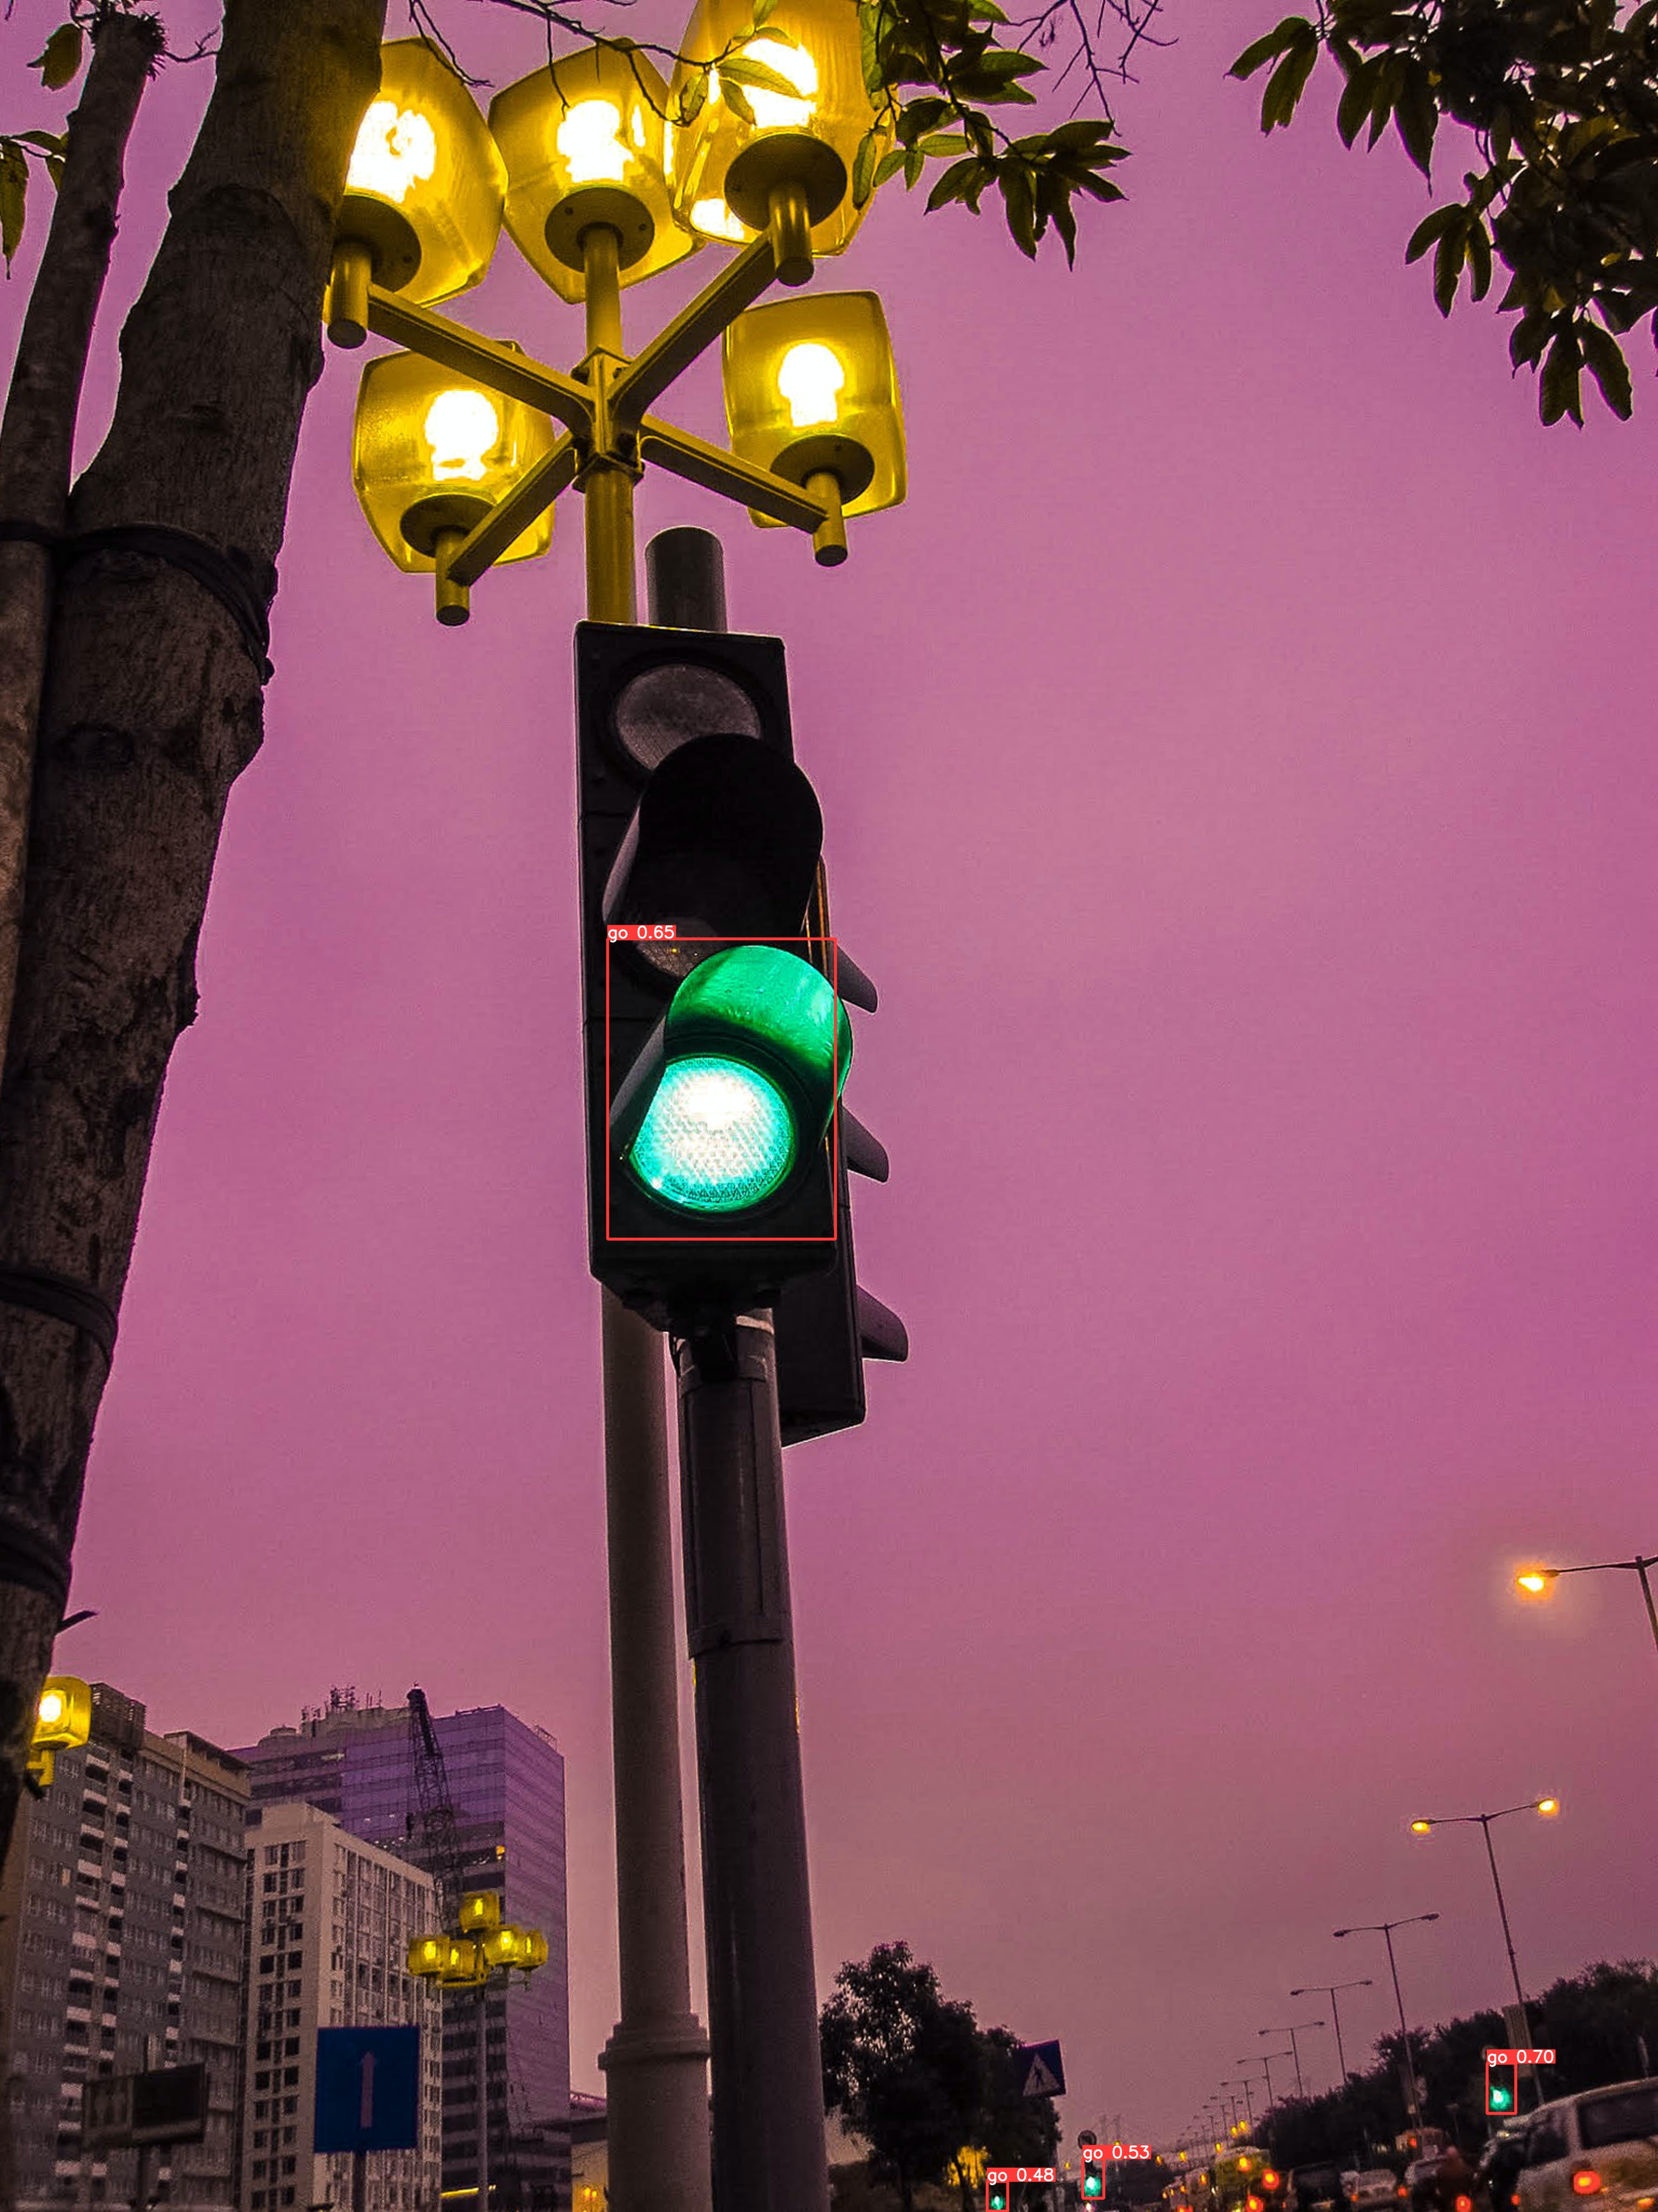

In [ ]:
display(Image(filename='runs/detect/exp5/test3.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/images/test1.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/images/test1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/CV/test/images/test1.jpg: 480x640 6 gos, 1 stop, 73.9ms
Speed: 0.8ms pre-process, 73.9ms inference, 97.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


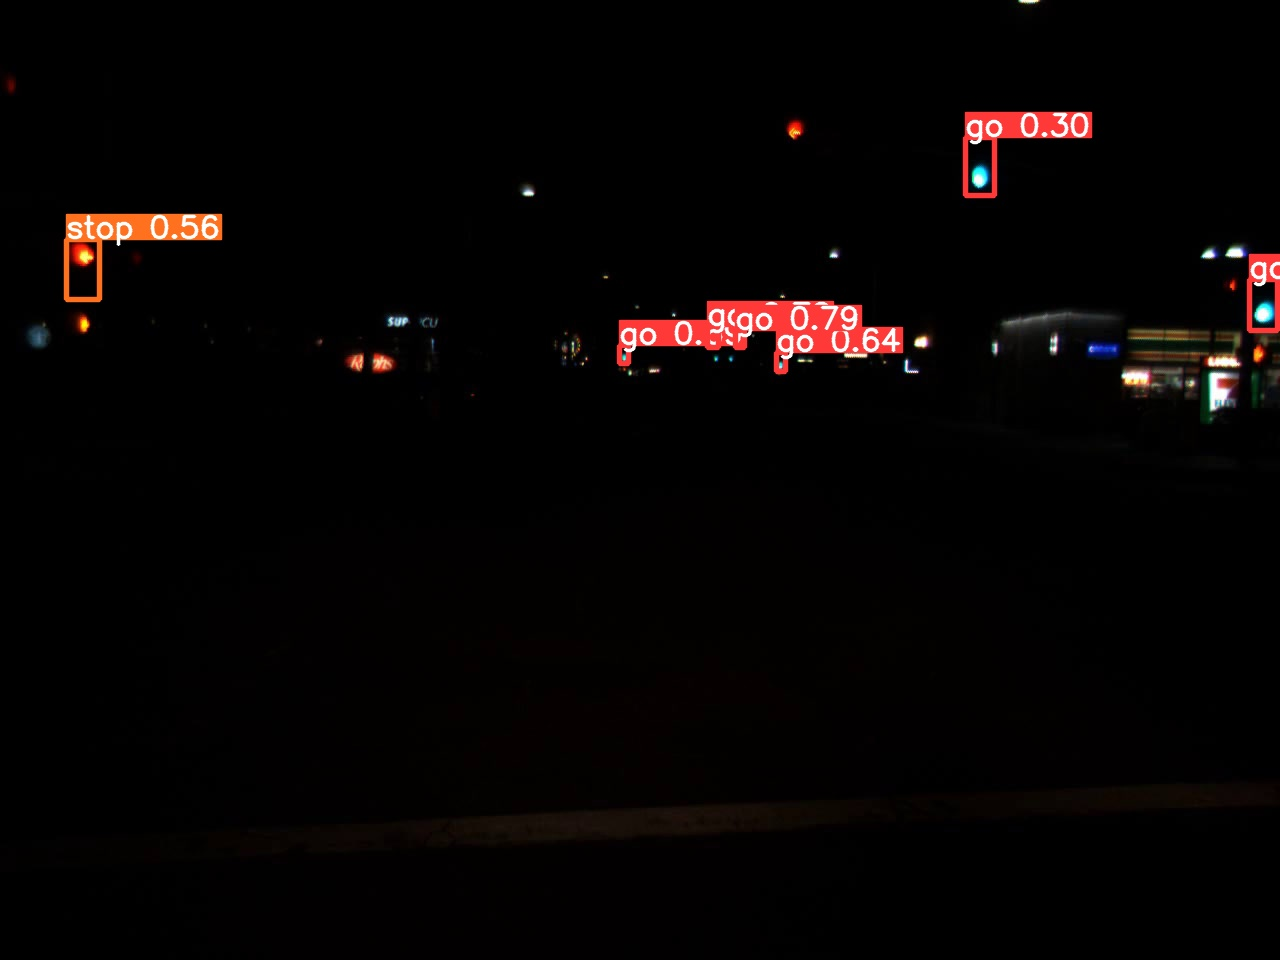

In [ ]:
display(Image(filename='runs/detect/exp8/test1.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/videos/test.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/videos/test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 2 gos, 75.8ms
video 1/1 (2/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 2 gos, 32.2ms
video 1/1 (3/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 2 gos, 32.1ms
video 1/1 (4/3221) /content/drive/MyDrive/CV/test/

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/videos/test1.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/videos/test1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 80.3ms
video 1/1 (2/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 31.5ms
video 1/1 (3/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 31.4ms
video 1/1 (4/3558) /content/drive/MyDrive/CV/test

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV/test/videos/test2.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV/test/videos/test2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 5 stops, 124.8ms
video 1/1 (2/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 5 stops, 32.2ms
video 1/1 (3/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 5 stops, 32.1ms
video 1/1 (4/2766) /content/drive/MyDri

# Yolov8

In [ ]:
%cd /content/drive/MyDrive/CV/yolov8

/content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/yolov8


In [ ]:
!pip install ultralytics

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


## Train

In [ ]:
!yolo detect train data="/content/drive/MyDrive/CV/Data_YOLO/data.yaml" model=yolov8l.pt epochs=20 imgsz=640

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

In [ ]:
!yolo detect train resume data="/content/drive/MyDrive/CV/Data_YOLO/data.yaml" model='runs/detect/train2/weights/last.pt' 

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/CV/Data_YOLO/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

## Eval

In [ ]:
!yolo val model='runs/detect/train2/weights/best.pt' data="/content/drive/MyDrive/CV/Data_YOLO/data.yaml" iou=0.5

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 17.0MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/Data_YOLO/valid/labels... 2605 images, 0 backgrounds, 0 corrupt: 100% 2605/2605 [01:30<00:00, 28.66it/s]
val: New cache created: /content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/Data_YOLO/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 163/163 [01:41<00:00,  1.60it/s]
                   all       2605       9083      0.946      0.904      0.948      0.731
                    go       2605       3968      0.951      0.907      0.955      0.805
               warning       2605        291      0.922      0.863      0.909      0.534
    

In [ ]:
!yolo val model='runs/detect/train2/weights/best.pt' data="/content/drive/MyDrive/CV/Data_YOLO/data.yaml" iou=0.75

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients
val: Scanning /content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/Data_YOLO/valid/labels.cache... 2605 images, 0 backgrounds, 0 corrupt: 100% 2605/2605 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 163/163 [01:42<00:00,  1.60it/s]
                   all       2605       9083      0.943      0.898      0.943      0.728
                    go       2605       3968      0.952      0.896      0.952      0.798
               warning       2605        291      0.912      0.863      0.903      0.535
                  stop       2605       4824      0.966      0.934      0.976      0.851
Speed: 0.4ms preprocess, 28.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


## Detect

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/images/test.jpg'

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/CV/test/images/test.jpg: 480x640 3 stops, 62.3ms
Speed: 2.2ms preprocess, 62.3ms inference, 90.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


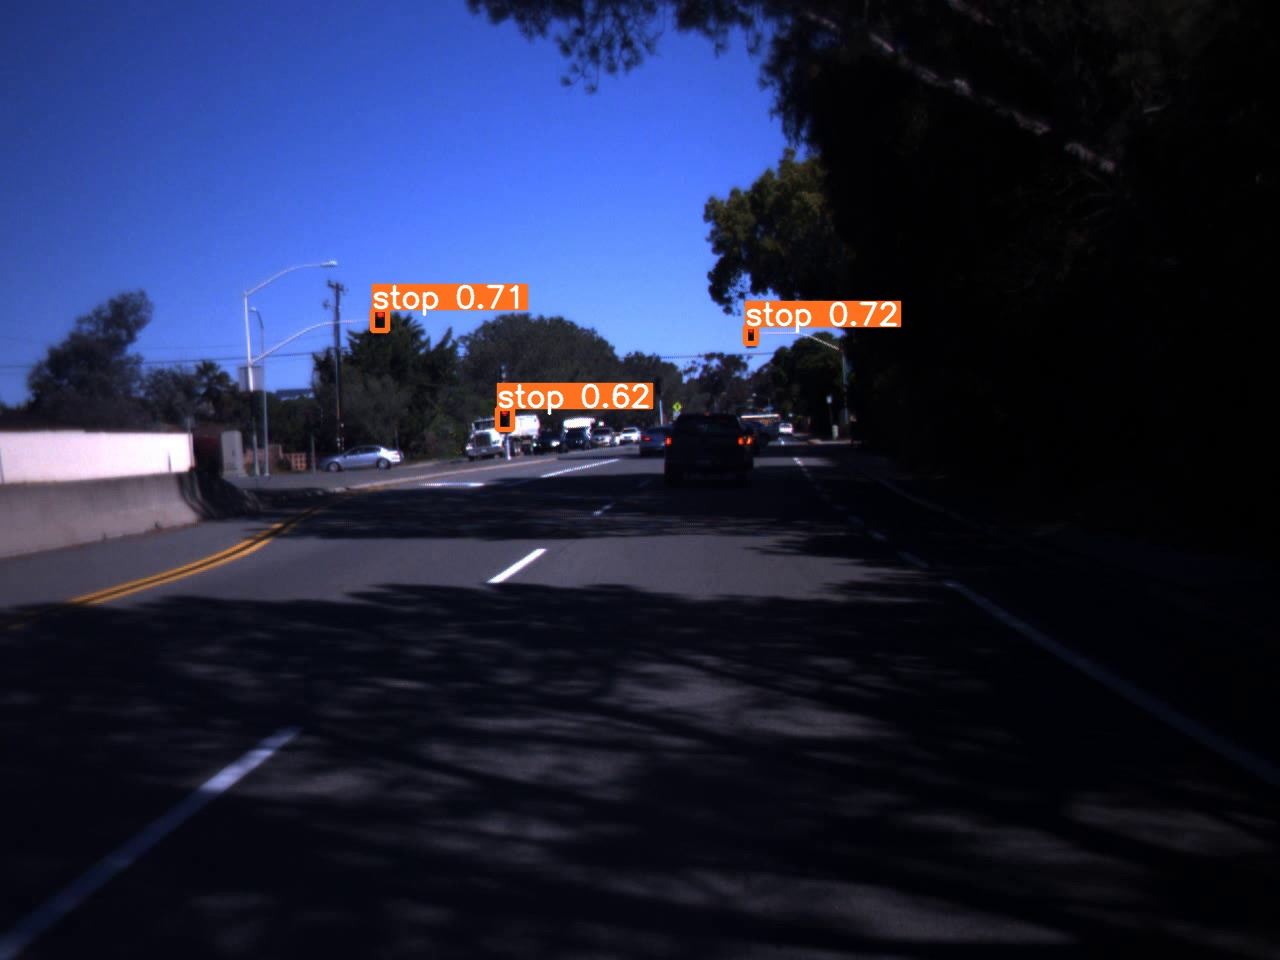

In [ ]:
display(Image(filename='runs/detect/predict/test.jpg'))

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/images/test1.jpg'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/CV/test/images/test1.jpg: 480x640 3 gos, 59.1ms
Speed: 2.2ms preprocess, 59.1ms inference, 127.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


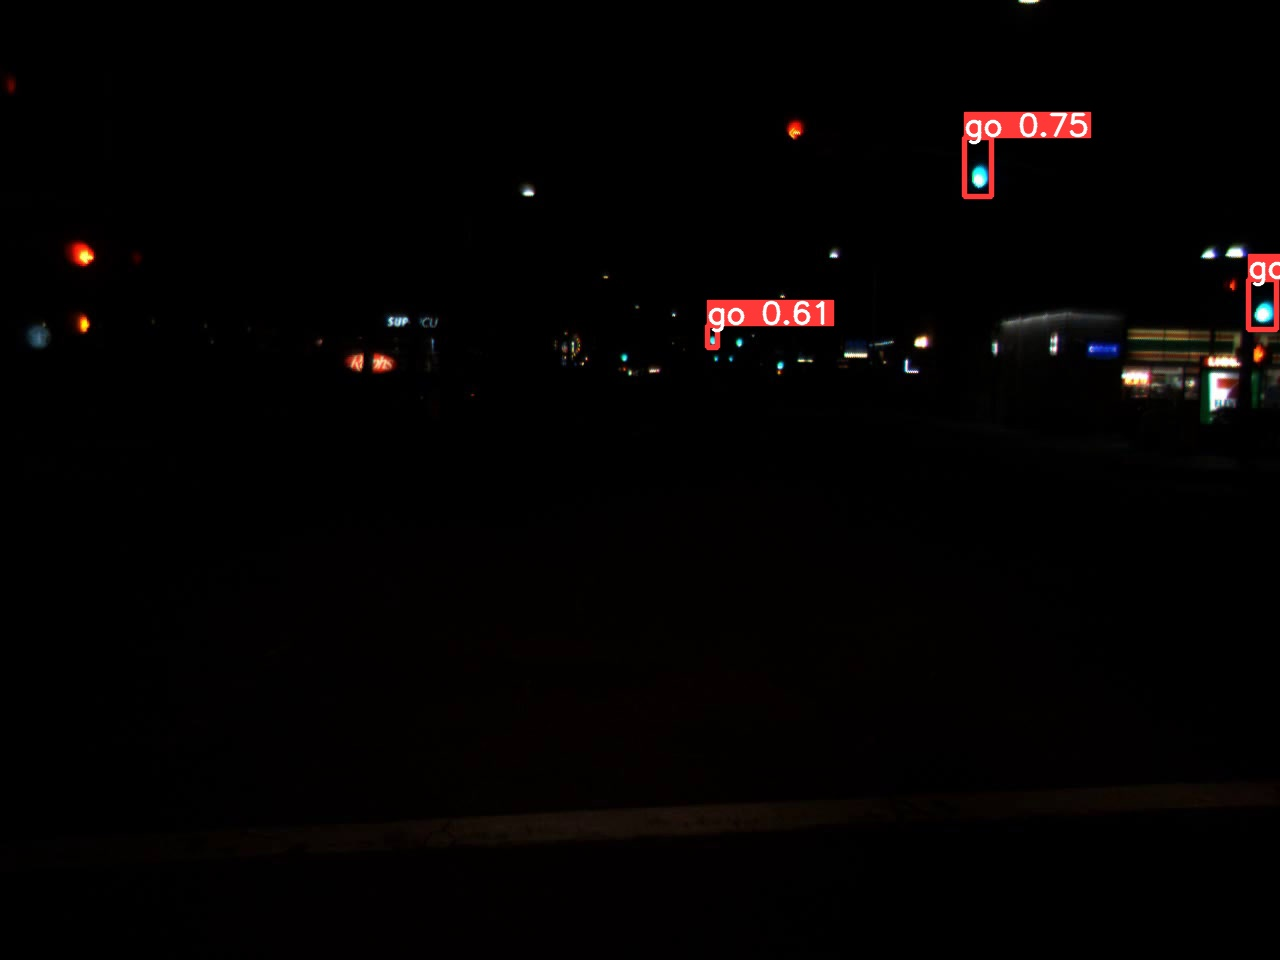

In [ ]:
display(Image(filename='runs/detect/predict2/test1.jpg'))

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/images/test2.jpg'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/CV/test/images/test2.jpg: 416x640 (no detections), 84.0ms
Speed: 2.3ms preprocess, 84.0ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


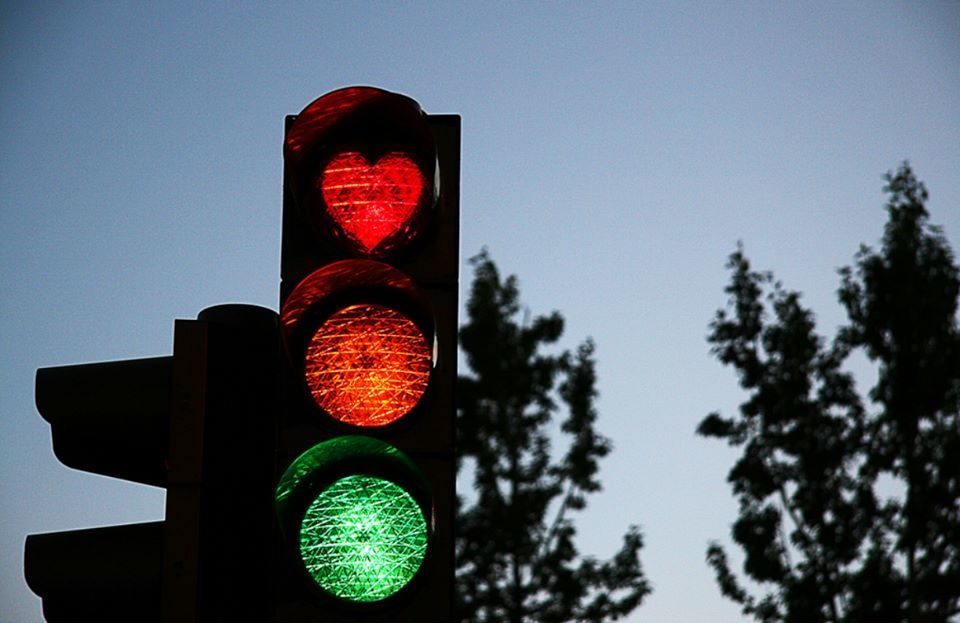

In [ ]:
display(Image(filename='runs/detect/predict3/test2.jpg'))

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/images/test3.jpg'

WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/CV/test/images/test3.jpg: 640x480 2 gos, 94.6ms
Speed: 4.3ms preprocess, 94.6ms inference, 103.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


In [ ]:
display(Image(filename='runs/detect/predict4/test3.jpg'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/images/test4.jpg'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/CV/test/images/test4.jpg: 480x640 2 gos, 2 stops, 67.1ms
Speed: 2.5ms preprocess, 67.1ms inference, 81.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


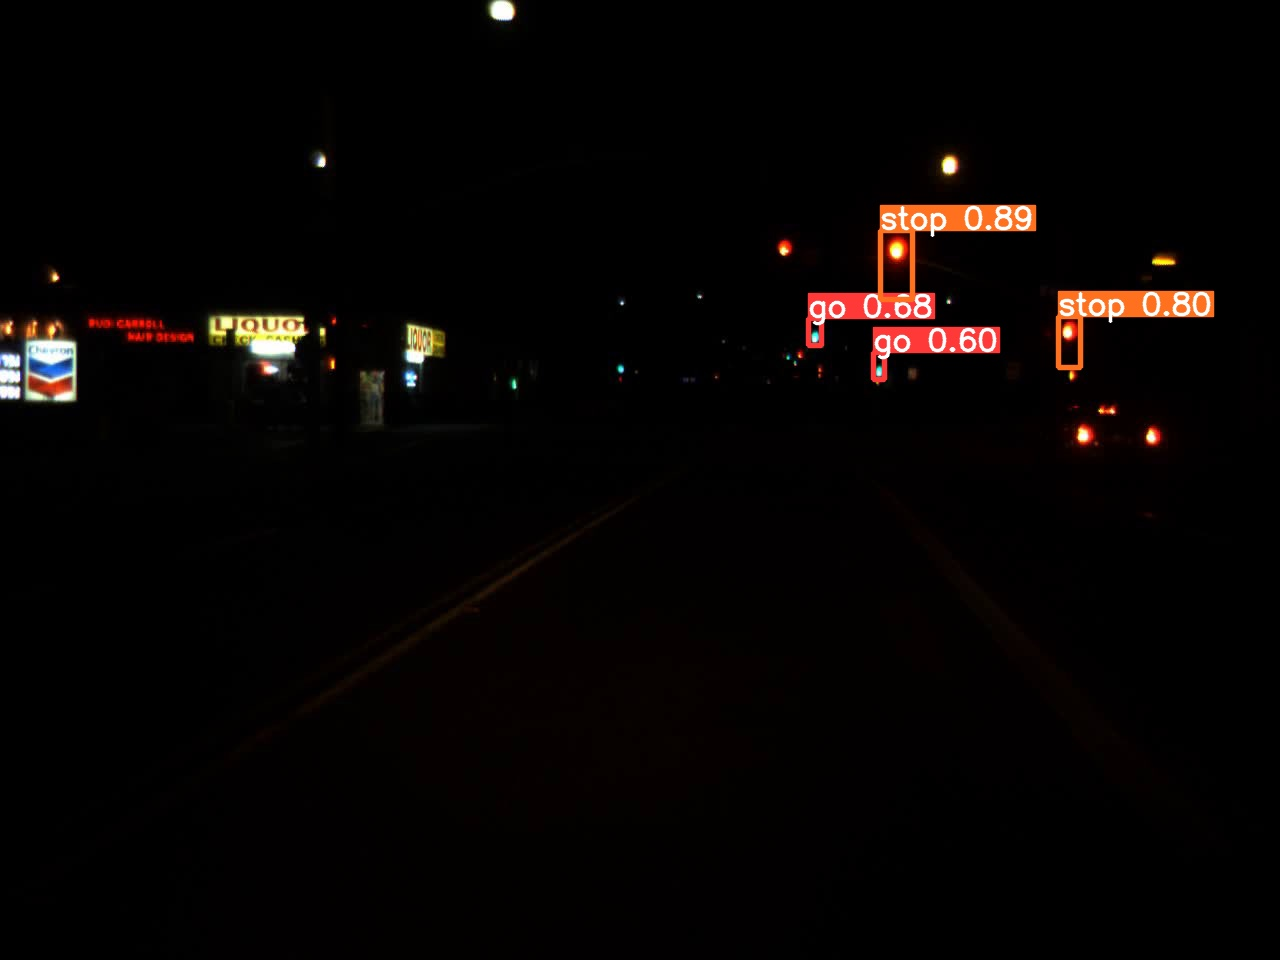

In [ ]:
display(Image(filename='runs/detect/predict5/test4.jpg'))

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/videos/test.mp4'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

video 1/1 (1/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 110.4ms
video 1/1 (2/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 35.3ms
video 1/1 (3/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 4 gos, 35.2ms
video 1/1 (4/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 35.2ms
video 1/1 (5/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 35.2ms
video 1/1 (6/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 33.3ms
video 1/1 (7/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 21.3ms
video 1/1 (8/3221) /content/drive/MyDrive/CV/test/videos/test.mp4: 384x640 3 gos, 21.3ms
video 1/1 (9/3221) /content/drive/MyDrive/CV/tes

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/videos/test1.mp4'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

video 1/1 (1/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 69.8ms
video 1/1 (2/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 40.7ms
video 1/1 (3/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 40.7ms
video 1/1 (4/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 1 stop, 40.8ms
video 1/1 (5/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 40.7ms
video 1/1 (6/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 23.5ms
video 1/1 (7/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 23.5ms
video 1/1 (8/3558) /content/drive/MyDrive/CV/test/videos/test1.mp4: 384x640 1 go, 23.5ms
video 1/1 (9/3558) /content/drive/MyDrive

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='/content/drive/MyDrive/CV/test/videos/test2.mp4'

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients

video 1/1 (1/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 1 stop, 85.7ms
video 1/1 (2/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 1 stop, 38.2ms
video 1/1 (3/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 2 stops, 38.1ms
video 1/1 (4/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 2 stops, 38.1ms
video 1/1 (5/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 1 stop, 38.1ms
video 1/1 (6/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 1 stop, 22.8ms
video 1/1 (7/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 (no detections), 22.5ms
video 1/1 (8/2766) /content/drive/MyDrive/CV/test/videos/test2.mp4: 384x640 (no detections), 23.0ms
video 1/1 (9/